In [0]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [326]:
tf.__version__

'1.15.0'

**Load Data**

In [327]:
pip install MNIST


In [328]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [329]:
print("Size of: ")
print("- Training-set :\t\t{}".format(len(data.train.labels)))
print("- Test-set :\t\t\t{}".format(len(data.test.labels)))
print("- Validation-set :\t\t{}".format(len(data.validation.labels)))

Size of: 
- Training-set :		55000
- Test-set :			10000
- Validation-set :		5000


In [330]:
data.test.labels[0:5, : ]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [332]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [0]:
#as we know MNIST images are 28 pixels ineach dimension
img_size = 28
img_size_flat = img_size * img_size
#print(img_size_flat)
img_shape=(img_size,img_size)
num_classes =10

In [0]:
def plot_images(images, cls_true, cls_pred=None):
  assert len(images) == len(cls_true) == 9

  #creating figure 3x3 sub-plts
  fig, axes = plt.subplots(3,3)
  #print(fig)
  #print(list(enumerate(axes.flat)))
  fig.subplots_adjust(hspace=0.3,wspace=0.3)

  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i].reshape(img_shape), cmap='binary')

    #show true and predicted classes 
    if cls_pred is None:
      xlabel = "True: {0}".format(cls_true[i])
    else:
      xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

    ax.set_xlabel(xlabel)

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

  plt.show()
    

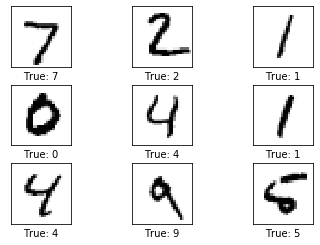

In [335]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images,cls_true=cls_true)

Here we are just building the computational graph then later we are going to execute


In [0]:
#@title Default title text
x=tf.placeholder(tf.float32,[None, img_size_flat])
#print(x)

In [0]:
y_true = tf.placeholder(tf.float32,[None, num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])
#print(y_true_cls)

In [0]:
 weights=tf.Variable(tf.zeros([img_size_flat, num_classes]))
 #print(weights)

In [0]:
biases = tf.Variable(tf.zeros([num_classes]))

**Model**

In [0]:
#The result is a matrix of shape [num_images, num_classes] 
#because x has shape [num_images, img_size_flat] and 
#weights has shape [img_size_flat, num_classes], 
#so the multiplication of those two matrices is a matrix with 
#shape [num_images, num_classes] and then the biases vector 
#is added to each row of that matrix.
logits = tf.matmul(x,weights)+biases
#print(logits)

In [0]:
y_pred = tf.nn.softmax(logits)
#print(y_pred)

In [0]:
y_pred_cls = tf.arg_max(y_pred, dimension=1)
#print(y_pred_cls)

In [0]:
cross_entropy =tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
#print(cross_entropy)

In [0]:
cost = tf.reduce_mean(cross_entropy)
#print(cost)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

**lets run our computational graph**

In [0]:
session = tf.Session()

In [0]:
session.run(tf.initialize_all_variables())

In [0]:
batch_size = 100

In [0]:
def optimize(num_iterations):
  for i in range(num_iterations):
    x_batch, y_true_batch = data.train.next_batch(batch_size)
    feed_dict_train = {x:x_batch ,y_true:y_true_batch}
    session.run(optimizer, feed_dict=feed_dict_train)

In [0]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [0]:
def print_accuracy():
  acc = session.run(accuracy, feed_dict=feed_dict_test)
  print("Accuracy on test set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
  cls_true = data.test.cls
  cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
  cm=confusion_matrix(y_true=cls_true,y_pred=cls_pred)
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.colorbar()
  tick_marks = np.arange(num_classes)
  plt.xticks(tick_marks, range(num_classes))
  plt.yticks(tick_marks, range(num_classes))
  plt.xlabel('Predicted')
  plt.ylabel('True')
    
  # Ensure the plot is shown correctly with multiple plots
  # in a single Notebook cell.
  plt.show()

In [0]:
def plot_example_errors():
  correct,cls_pred = session.run([correct_prediction, y_pred_cls],feed_dict=feed_dict_test)
  incorrect = (correct == False)
  images = data.test.images[incorrect]
  cls_pred = cls_pred[incorrect]
  cls_true = data.test.cls[incorrect]
  plot_images(images=images[0:9],cls_true = cls_true[0:9],cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
  w=session.run(weights)
  w_min = np.min(w)
  w_max = np.max(w)

  fig, axes = plt.subplots(3, 4)
  fig.subplots_adjust(hspace=0.3, wspace=0.3) 

  for i, ax in enumerate(axes.flat):
    if i<10:
      image = w[:, i].reshape(img_shape)
      ax.set_xlabel("Weights: {0}".format(i))
      ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

    ax.set_xticks([])
    ax.set_yticks([])

  plt.show()

In [357]:
print_accuracy()

Accuracy on test set: 9.8%


In [0]:
def plot_example_predictions():
  correct,cls_pred = session.run([correct_prediction, y_pred_cls],feed_dict=feed_dict_test)
  incorrect = (correct == True)
  images = data.test.images[0:9]
  cls_pred = cls_pred[0:9]
  cls_true = data.test.cls[0:9]
  plot_images(images=images[0:9],cls_true = cls_true[0:9],cls_pred=cls_pred[0:9])

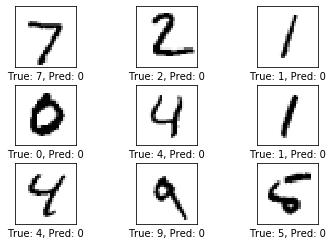

In [359]:
plot_example_predictions()

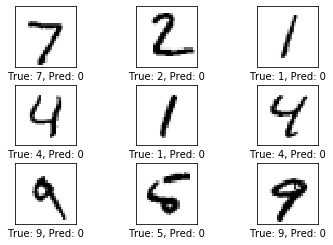

In [360]:
plot_example_errors()

In [0]:
optimize(num_iterations=1)

In [362]:
print_accuracy()

Accuracy on test set: 30.7%


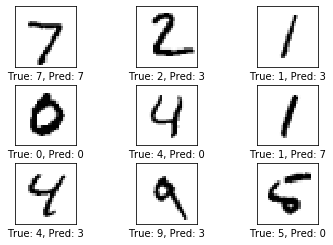

In [363]:
plot_example_predictions()

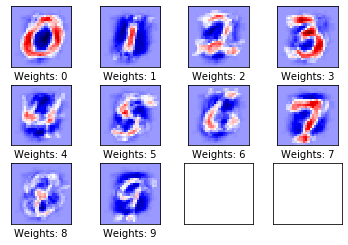

In [364]:
plot_weights()

In [0]:
optimize(num_iterations=4)

In [366]:
print_accuracy()

Accuracy on test set: 65.1%


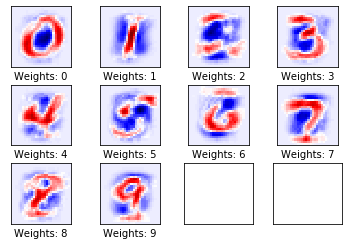

In [367]:
plot_weights()

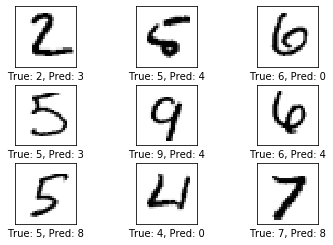

In [368]:
plot_example_errors()

In [0]:
optimize(num_iterations=10)

In [370]:
print_accuracy()

Accuracy on test set: 83.4%


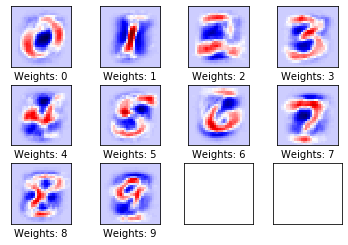

In [371]:
plot_weights()

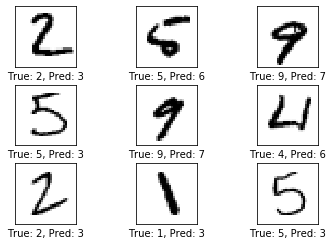

In [372]:
plot_example_errors()

In [0]:
optimize(num_iterations=15)

In [374]:
print_accuracy()

Accuracy on test set: 85.6%


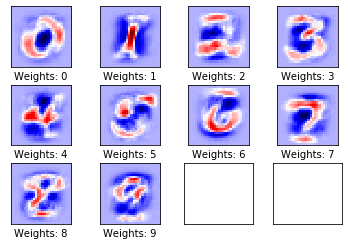

In [375]:
plot_weights()

[[ 947    0    3    0    0    3   18    1    8    0]
 [   0 1104    8    3    0    1    4    0   15    0]
 [  14   13  906    7   15    0   26   11   39    1]
 [  13    7   48  816    2   36   22   12   49    5]
 [   1   18   11    0  891    2   24    0   23   12]
 [  36   24   16   27   22  655   43    6   60    3]
 [  18    6   16    0    9   11  894    0    4    0]
 [   8   41   57    0   23    0    4  870    7   18]
 [  11   29   21   12    9   16   18   10  847    1]
 [  19   20   29    7  193   22    2   37   46  634]]


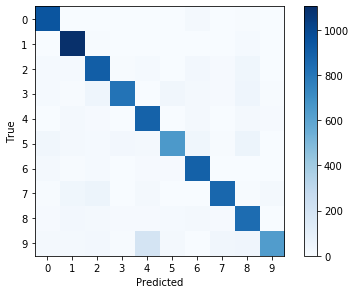

In [376]:
print_confusion_matrix()

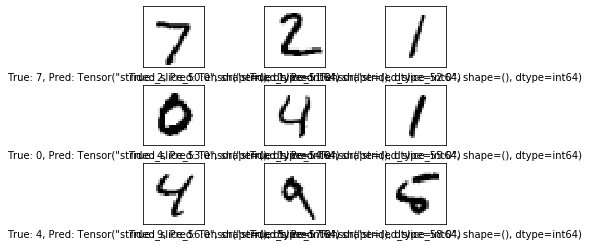

In [377]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images,cls_true=cls_true,cls_pred=y_true_cls[0:9])

In [0]:
def plot_example_predictions():
  correct,cls_pred = session.run([correct_prediction, y_pred_cls],feed_dict=feed_dict_test)
  incorrect = (correct == True)
  images = data.test.images[0:9]
  cls_pred = cls_pred[0:9]
  cls_true = data.test.cls[0:9]
  plot_images(images=images[0:9],cls_true = cls_true[0:9],cls_pred=cls_pred[0:9])

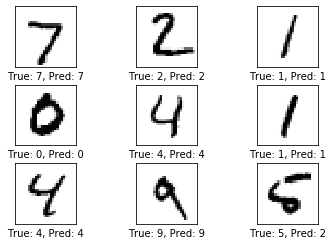

In [379]:
plot_example_predictions()